### Install Necessary Libraries

In [0]:
# Install libraries
%pip install umap-learn scikit-learn pandas matplotlib

Python interpreter will be restarted.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Not uninstalling numpy at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-c779f6b0-435e-46db-b9da-367f31ec30ca
    Can't uninstall 'numpy'. No files were found to uninstall.
Python interpreter will be restarted.


### Import Libraries

In [0]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

### Load Dataset

In [0]:
# Load the Breast Cancer dataset
cancer_data = load_breast_cancer()
X = cancer_data.data  # Features
y = cancer_data.target  # Target labels

### Data Preparation

In [0]:
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Convert to DataFrame for better visualization
cancer_df = pd.DataFrame(X_standardized, columns=cancer_data.feature_names)
cancer_df['target'] = cancer_data.target

# Show the first few rows of the dataset
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


# Locally Linear Embedding (LLE)

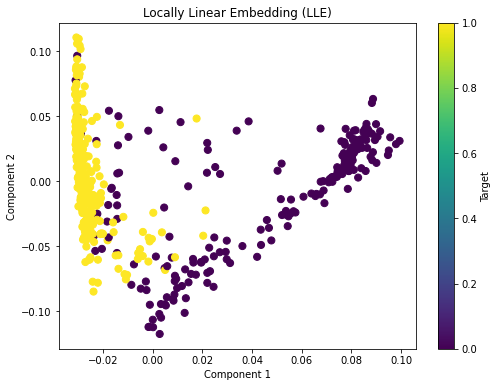

In [0]:
from sklearn.manifold import LocallyLinearEmbedding

# Apply LLE
lle = LocallyLinearEmbedding(n_neighbors=5, n_components=2)
X_lle = lle.fit_transform(X_standardized)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap='viridis', s=50)
plt.title("Locally Linear Embedding (LLE)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Target")
plt.show()

# t-SNE

In [0]:
from sklearn.manifold import TSNE
import plotly.express as px

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=1000)
X_tsne = tsne.fit_transform(X_standardized)

# Interactive visualization with Plotly
tsne_df = pd.DataFrame(X_tsne, columns=["Component 1", "Component 2"])
tsne_df['target'] = cancer_data.target

fig = px.scatter(tsne_df, x="Component 1", y="Component 2", color="target", title="t-SNE Visualization")
fig.show()

/databricks/python/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/databricks/python/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


# ISOMAP

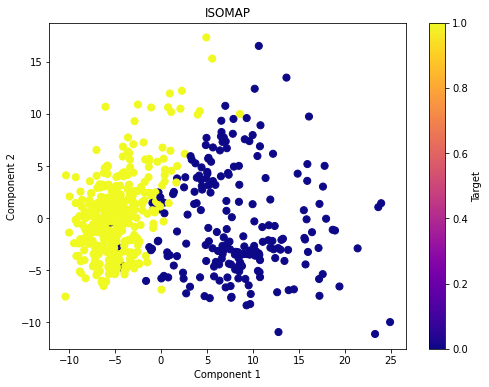

In [0]:
from sklearn.manifold import Isomap

# Apply ISOMAP
isomap = Isomap(n_neighbors=5, n_components=2)
X_isomap = isomap.fit_transform(X_standardized)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='plasma', s=50)
plt.title("ISOMAP")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Target")
plt.show()

# UMAP

In [0]:
import umap

# Apply UMAP
umap_model = umap.UMAP(n_neighbors=5, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_standardized)

# Interactive visualization with Plotly
umap_df = pd.DataFrame(X_umap, columns=["Component 1", "Component 2"])
umap_df['target'] = cancer_data.target

fig = px.scatter(umap_df, x="Component 1", y="Component 2", color="target", title="UMAP Visualization")
fig.show()

/local_disk0/.ephemeral_nfs/envs/pythonEnv-c779f6b0-435e-46db-b9da-367f31ec30ca/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



# MultiDimensional Scaling (MDS)

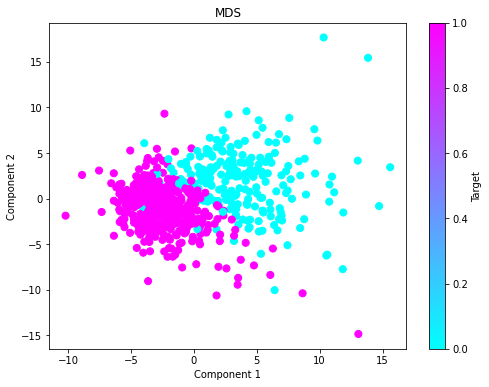

In [0]:
from sklearn.manifold import MDS

# Apply MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_standardized)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap='cool', s=50)
plt.title("MDS")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Target")
plt.show()

# Randomized PCA

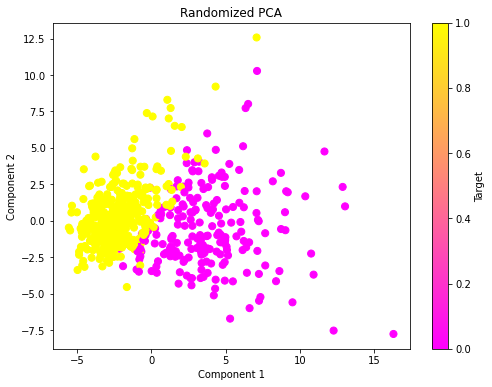

In [0]:
from sklearn.decomposition import PCA

# Apply Randomized PCA
randomized_pca = PCA(n_components=2, svd_solver='randomized', random_state=42)
X_randomized_pca = randomized_pca.fit_transform(X_standardized)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_randomized_pca[:, 0], X_randomized_pca[:, 1], c=y, cmap='spring', s=50)
plt.title("Randomized PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Target")
plt.show()

# Kernel PCA

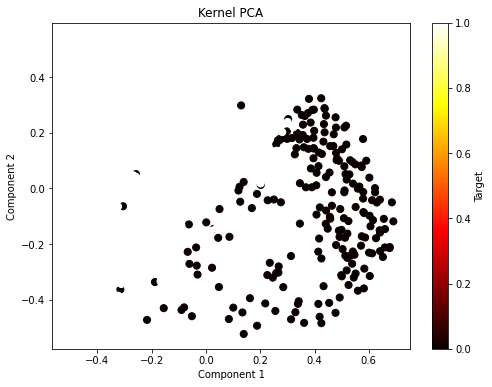

In [0]:
from sklearn.decomposition import KernelPCA

# Apply Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
X_kernel_pca = kernel_pca.fit_transform(X_standardized)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_kernel_pca[:, 0], X_kernel_pca[:, 1], c=y, cmap='hot', s=50)
plt.title("Kernel PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Target")
plt.show()

# Incremental PCA

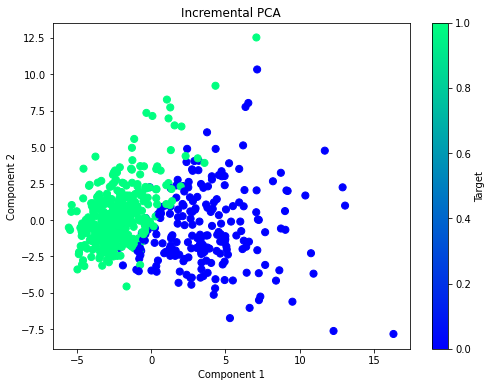

In [0]:
from sklearn.decomposition import IncrementalPCA

# Apply Incremental PCA
incremental_pca = IncrementalPCA(n_components=2)
X_incremental_pca = incremental_pca.fit_transform(X_standardized)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_incremental_pca[:, 0], X_incremental_pca[:, 1], c=y, cmap='winter', s=50)
plt.title("Incremental PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Target")
plt.show()

# Factor Analysis

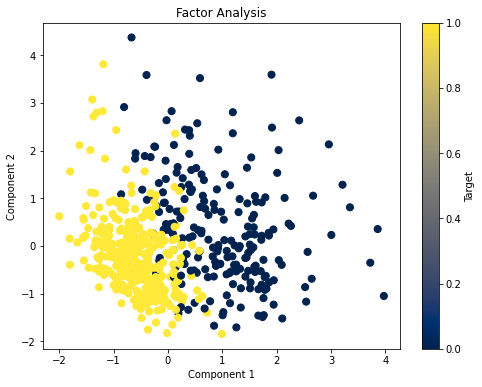

In [0]:
from sklearn.decomposition import FactorAnalysis

# Apply Factor Analysis
factor_analysis = FactorAnalysis(n_components=2, random_state=42)
X_fa = factor_analysis.fit_transform(X_standardized)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, cmap='cividis', s=50)
plt.title("Factor Analysis")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Target")
plt.show()